# DEODE training
## Simple plotting of 2D fields 

In [13]:
# Personal info
username = 'nknt'
path_to_exercises = f'/home/{username}/deode/DE330_Training_2024/Exercises/'
path_to_domain = f'/perm/{username}/git/github/natalieth/deode/develop/deode/data/config_files/include/domains/DEMO_60x80_2500m.toml'

In [14]:
# load some useful libraries 
import os,sys,glob
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import toml
import warnings
from datetime import datetime,time
warnings.filterwarnings('ignore')

# local libraries
sys.path.append(f'{path_to_exercises}Plot')
from mapping import setup_map,setup_map_subplots

Assuming you've managed to do a simulation with all three CSC's we can now load some data. 

In [15]:
####### runs #######
d_alar = f'/ec/res4/scratch/{username}/deode/CY48t3_ALARO/archive/'
d_arom = f'/ec/res4/scratch/{username}/deode/CY48t3_AROME/archive/'
d_harm = f'/ec/res4/scratch/{username}/deode/CY46h1_HARMONIE_AROME/archive/'

In [16]:
####### Domain #######
f_domain = toml.load(path_to_domain)
domain = {'nx': f_domain['domain']['nimax'], 'ny': f_domain['domain']['njmax'],'name': f_domain['domain']['name'],'ezone':11}

In [17]:
####### read 2m Temperature during one time #######

init_time = datetime(2023,9,16,0)
lead_time = time(hour = 5, minute = 00) # offset from the model run time

ft2_alar =xr.open_dataset(d_alar+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})

ft2_arom =xr.open_dataset(d_arom+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})
ft2_harm =xr.open_dataset(d_harm+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})
dims = (domain['ny'],domain['nx'])
lon = np.reshape(np.array(ft2_arom.longitude),dims)
lat = np.reshape(np.array(ft2_arom.latitude),dims)
t2_alar = np.reshape(np.array(ft2_alar.t2m),dims)
t2_arom = np.reshape(np.array(ft2_arom.t2m),dims)
t2_harm = np.reshape(np.array(ft2_harm.t2m),dims)

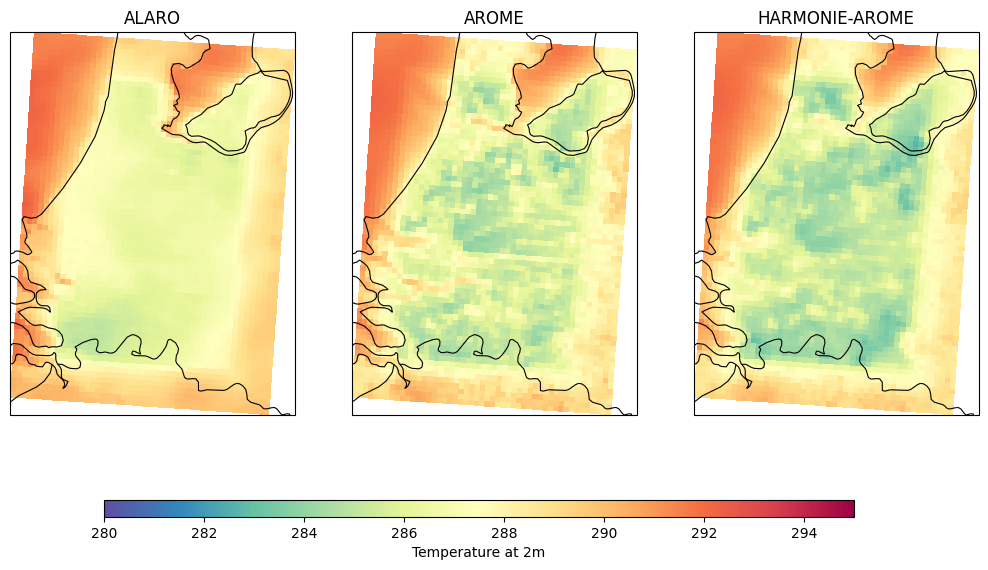

In [18]:
####### First plots #######
vmin = 280
vmax = 295
fig,ax = setup_map_subplots(1,3)
fig.set_size_inches(12.5, 8.5)
ax[0].set_title('ALARO')
im = ax[0].pcolormesh(lon,lat,t2_alar,vmin=vmin,vmax=vmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
ax[1].set_title('AROME')
im = ax[1].pcolormesh(lon,lat,t2_arom,vmin=vmin,vmax=vmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
ax[2].set_title('HARMONIE-AROME')
im = ax[2].pcolormesh(lon,lat,t2_harm,vmin=vmin,vmax=vmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal',label='Temperature at 2m')

In [19]:
####### read total cloud cover Temperature during one time #######

init_time = datetime(2023,9,16,0)
lead_time = time(hour = 5, minute = 00) # offset from the model run time

ftcc_alar =xr.open_dataset(d_alar+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': 'tcc'}})
ftcc_arom =xr.open_dataset(d_arom+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': 'tcc'}})
ftcc_harm =xr.open_dataset(d_harm+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': 'tcc'}})
print(ftcc_alar)
dims = (domain['ny'],domain['nx'])
lon = np.reshape(np.array(ftcc_arom.longitude),dims)
lat = np.reshape(np.array(ftcc_arom.latitude),dims)
tcc_alar = np.reshape(np.array(ftcc_alar.tcc),dims)
tcc_arom = np.reshape(np.array(ftcc_arom.tcc),dims)
tcc_harm = np.reshape(np.array(ftcc_harm.tcc),dims)

<xarray.Dataset> Size: 68kB
Dimensions:           (values: 3381)
Coordinates:
    time              datetime64[ns] 8B ...
    step              timedelta64[ns] 8B ...
    entireAtmosphere  float64 8B ...
    latitude          (values) float64 27kB ...
    longitude         (values) float64 27kB ...
    valid_time        datetime64[ns] 8B ...
Dimensions without coordinates: values
Data variables:
    tcc               (values) float32 14kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-06-14T10:09 GRIB to CDM+CF via cfgrib-0.9.1...


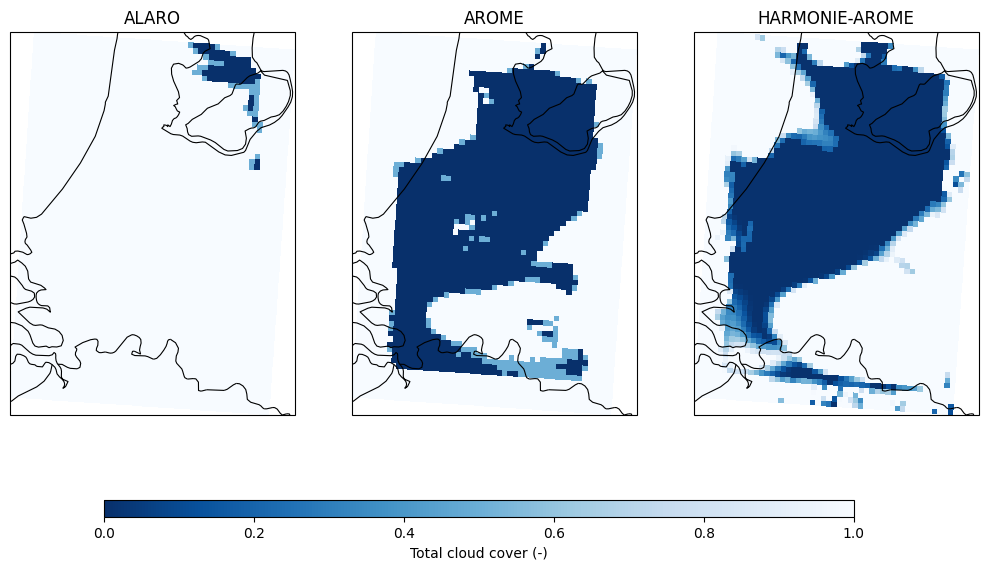

In [20]:
####### Plot of cloud cover for the same time #######
vmin = 0
vmax = 1
fig,ax = setup_map_subplots(1,3)
fig.set_size_inches(12.5, 8.5)
ax[0].set_title('ALARO')
im2 = ax[0].pcolormesh(lon,lat,tcc_alar,vmin=vmin,vmax=vmax,cmap='Blues_r',transform=ccrs.PlateCarree())
ax[1].set_title('AROME')
im2 = ax[1].pcolormesh(lon,lat,tcc_arom,vmin=vmin,vmax=vmax,cmap='Blues_r',transform=ccrs.PlateCarree())
ax[2].set_title('HARMONIE-AROME')
im2 = ax[2].pcolormesh(lon,lat,tcc_harm,vmin=vmin,vmax=vmax,cmap='Blues_r',transform=ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar=fig.colorbar(im2, cax=cbar_ax,orientation='horizontal',label='Total cloud cover (-)')

## Time series plots at one point
One example of extracting 100 m wind speed and plotting a time series.

In [21]:
# select a latitude and longitude of the point to extract
lat_sel = 51.971  # Cabauw
lon_sel = 4.927   # Cabauw

In [29]:
# make array of all gribfiles in dir
files_alar = glob.glob(d_alar+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+*m00s")
files_arom = glob.glob(d_arom+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+*m00s")
files_harm = glob.glob(d_harm+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+*m00s")
# read all grib files
f100_alar =xr.open_mfdataset(files_alar,combine='nested',concat_dim = 'valid_time',
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','typeOfLevel': 'heightAboveGround','level':100 }})
f100_arom =xr.open_mfdataset(files_arom,combine='nested',concat_dim = 'valid_time',
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','typeOfLevel': 'heightAboveGround','level':100 }})
f100_harm =xr.open_mfdataset(files_harm,combine='nested',concat_dim = 'valid_time',
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','typeOfLevel': 'heightAboveGround','level':100 }})

dims = (len(f100_alar.valid_time),domain['ny'],domain['nx'])

u100_alar = np.sqrt(np.reshape(np.array(f100_alar.u100),dims)**2 + 
                    np.reshape(np.array(f100_alar.v100),dims)**2)
u100_arom = np.sqrt(np.reshape(np.array(f100_arom.u100),dims)**2 + 
                    np.reshape(np.array(f100_arom.v100),dims)**2)
u100_harm = np.sqrt(np.reshape(np.array(f100_harm.u100),dims)**2 + 
                    np.reshape(np.array(f100_harm.v100),dims)**2)

# find the nearest point
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(lat-lat_sel)
abslon = np.abs(lon-lon_sel)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))

u100_alar_cabauw = u100_alar[:,yloc,xloc]
u100_arom_cabauw = u100_arom[:,yloc,xloc]
u100_harm_cabauw = u100_harm[:,yloc,xloc]

In [ ]:
#### ...maybe get some obs if you have them....####
obs = true
if obs:
    cabauw_100m = xr.open_dataset('data/cesar_tower_meteo_la1_t10_v1.2_20230923.nc') ## unvalidated cabauw data
